# Mathematics for Neuroscience -- pre-reading material
**Barry Dillon**

**August 29th, 2024**

**For the *Computational Neuroscience, Neurotechnology and Neuro-inspired Artificial Intelligence* Autumn School**

**Built from notes by Áine Byrne and Rachel Nicks**



# Introduction

This notebook will cover some basic mathematics that will be used during the lectures at the summer school.  Here we'll cover the basics of differential equations and linear algebra.

# Differential equations


A differential equation is a relationship between one or more unknown functions and their derivatives. The functions represent physical quantities and the derivatives represent their rates of change.


## Definitions

>  If we consider a single quantity $u(t)$ that depends only on time $t$ then its evolution is governed by an **ordinary differential equation** (ODE).  Here $t$ is an **independent variable** and $u$ is the **dependent variable**. If $u$ depends two or more variables, say $u(x,t)$ then we have a **partial differential equation** (PDE).

>The **order** of a differential equation is the order of the highest derivative in the equation.

> A differential equation of the dependent variable $u$ is said to be **linear** if the only $u$-dependent terms are $u$ itself and derivatives of $u$ and also $u$ and its derivatives do not appear multiplied together. If a differential equation does not satisfy these conditions, it is said to be **nonlinear**. Typically, nonlinear equations are harder to solve than linear ones, but exhibit a much greater variety of behaviour.

> A differential equation is **autonomous** if it does not depend explicitly on the independent variables.


A simple example is the expression for unrestricted population growth:

$$\frac{{\rm d}N}{{\rm d}t}=a N,\tag{1}$$

where $N= N(t)$ is the size of a given population, $t$ is time and $a$ is a parameter describing the growth rate.
The derivative $\frac{{\rm d}N}{{\rm d}t}$ refers to the rate of change of $N$ as $t$ is varied, i.e. how is the population size going to change over time. On the right-hand side of the equation, we have an expression that prescribes that change. Assuming a positive initial population $N(0)>0$, if $a$ is positive, our rate of change $\frac{{\rm d}N}{{\rm d}t}$ will be positive, i.e. the population size is going to increase. If $a$ is a negative, the rate of change $\frac{{\rm d}N}{{\rm d}t}$ will be negative and the population size will decrease. Notice that there is also a $N$ on the right-hand side of the equation. So, if $N$ is small, the amount the population increases/decreases by is also going to be small, but the larger $N$ gets the larger increase/decrease will become.

It may help to think about this in a *discretised* manner, e.g. how much do we expect the population to increase each year. Imagine the population of a particular town is 10,000 and it increases by $0.1\times N$ each year. The change in population size this year will be $0.1\times 10000 = 1000$, so next year the population size will be 11,000. Now applying the same logic, the population in two years time will be $11000 + 0.1\times 11000 = 12100$. Below is a piece of code to apply this same logic to compute the population size for the next 25 years.

In [ ]:
N = 10000
a = 0.1

print('Year   ','dN/dt    ','N')
for i in range(1,26):
    print(i, '     ',round(a*N), '    ', round(N+a*N))
    N = N + a*N

**Exercise 1:** What happens if we change $a$ to be negative?


## Solving differential equations analytically

The **state** of the system at time $t$ is the value of all dependent variables at that time. We want to know how the state evolves from a given initial state (this is the **solution** of the system). All of the equations above are **deterministic** so that, given the initial state of the system, the differential equation determines the state of the system at all later times.

Sometimes differential equations can be solved to find an expression for the state variables as functions of time:

Recall our differential equation for unrestricted population growth $$\frac{{\rm d}N}{{\rm d}t}=a N.$$

With initial population $N(0)=N_0$, this equation can be solved analytically by separating the derivative $\frac{{\rm d}N}{{\rm d}t}$ and integrating both sides:
\begin{align*}\int_{N_0}^N\frac{1}{N^\prime}{\rm d}N^\prime&=\int_0^t a \, {\rm d}t^\prime\\
\log (N) - \log (N_0)&= at \\ N(t) &= N_0{\rm e}^{at}\end{align*}

See [Ordinary differential equation examples](https://mathinsight.org/ordinary_differential_equation_introduction_examples) on Maths Insight for details on how to solve certain classes of ODEs analytically. Maths is Fun also have a nice tutorial on [First Order Linear Differential Equations](https://www.mathsisfun.com/calculus/differential-equations-first-order-linear.html).

Setting our initial population size $N_0$ and growth rate $a$ we can compute the population size at all points in the future:



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N0 = 10000
a = 0.1
t = np.linspace(0,25,101)
N = N0*np.exp(a*t)

Let's plot the solution to see how the population size evolves with time

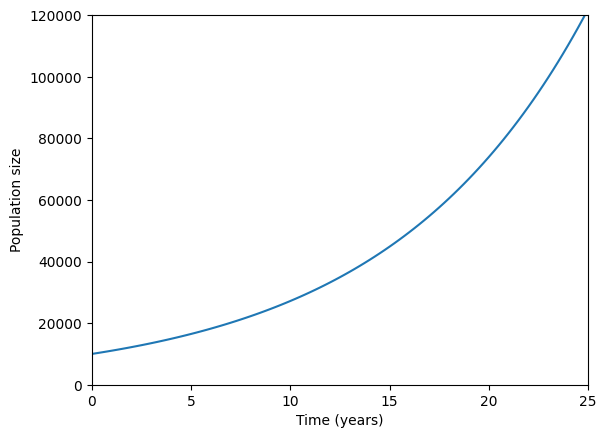

In [ ]:
plt.figure()
plt.plot(t,N)
plt.xlabel('Time (years)')
plt.ylabel('Population size')
plt.axis([0,25,0,120000])
plt.show()

Unfortunately, most ODEs do not have explicit expressions for their solutions, and we are forced to rely on other methods to determine how the solutions behave.

- Solutions can be approximated numerically
- The long term qualitative behaviour of solutions can be determined using dynamical systems theory. (For a given initial state, does the system state decay to zero,  grow indefinitely, grow to a finite value, or oscillate in time?)

We will introduce both approaches in the lectures, but both need some background in linear algebra:
to study differential equations numerically, we need to manipulate and store arrays of numbers and to study systems of differential equations we need to keep track of the dependent variables in arrays since for example the state space for HH is $(V(t), n(t), m(t), h(t))$ which is a time-dependent vector.


# Linear algebra

Linear algebra allows us to perform mathematical operations on arrays of numbers. Computational neuroscience, and computation more generally, relies heavily on linear algebra. The basic building blocks of linear algebra are vectors and matrices.

In this lecture will only cover the basics of linear algebra, if you would like to learn more, the [Khan Academy course on linear algebra](https://www.khanacademy.org/math/linear-algebra) is a good place to start.

## Vectors
Vectors are essentially lists of numbers. Mathematically speaking, an $n$-dimensional vector ($n$ numbers in the list) refers to a coordinate in $n$-dimensional space. For example, if we define a vector
$$v=\begin{bmatrix}x \\ y\end{bmatrix},$$
$x$ is the amount we move in one direction and $y$ is the amount we move in a perpendicular direction.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Vector_components.svg/1200px-Vector_components.svg.png" width=300 />

Python relies on a package called NumPy for linear algebra. Below is code for importing the NumPy package and creating a simple vector.   

In [ ]:
import numpy as np
v = np.array([1,2,3,4,5])
print(v)

In Python indexing starts a zero, so the first number in our vector is entry $0$, the second is entry $1$ and so on. To access specific entries, we use square brackets

In [ ]:
v[2]

### Basic operations
#### Scalar multiplication
A scalar is a single number, and scalar multiplication refers to multiplying a vector by a single number. With scalar multiplication, every entry is multiplied by this number.

In [ ]:
2*v

#### Addition
To add two vectors they must be the same length. The addition is performed element-by-element, i.e. the first element of vector one is added to the first element of vector two, the second element of vector one is added to the second element of vector two, and so on.


In [ ]:
u = np.array([3,7,1,6,4])
v+u

**Exercise 2:** Add the vectors $$a = \begin{bmatrix}5 \\ 1 \\ -9 \\ 3 \\ 7\end{bmatrix}, \qquad b = \begin{bmatrix}7 \\ 3 \\ 1 \\ -4 \\ 6\end{bmatrix}$$ by hand and then use Python to check your answer.

In [ ]:
a = np.array([5,1,-9,3,7])
b = np.array([7,3,1,-4,6])
a+b

#### Dot product
The dot product of two vectors is computed by performing element-by element multiplication and adding up all of the products, $$u\cdot v = u_1v_1 + u_2v_2 + \dots +u_nv_n .$$ As with adding two vectors, the two vectors must be the same length. To compute the dot product in Python we use the `dot()` function/method.

In [ ]:
u.dot(v)

**Note:** Using `u*v` will perform element-by-element multiplication, but not sum up the products.

In [ ]:
u*v

**Exercise 3:** Compute the dot product of the vectors $a$ and $b$ (given in Exercise 2) by hand. Then compute the dot product in Python. Do the two answers match?

In [ ]:
a.dot(b)

## Matrices

A matrix can be thought of as a collection of vectors of the same length. An $n\times m$ matrix is a rectangular array of numbers with $n$ rows and $m$ columns. For example,
$$A=\begin{bmatrix}2 & 8 & 4 \\ 1 & 0 & 3 \\ 5 & 1 & 6 \\ 8 & 3& 5\end{bmatrix} \text{ is a } 4\times 3 \text{ matrix, while }B=\begin{bmatrix}1 & 2 \\ 3 & 4 \\ 5 & 6\end{bmatrix} \text{ is a } 3\times 2 \text{ matrix.}$$

In Python, matrices are create in a similar manner to vectors. We simply give the `array` function a list of lists

In [ ]:
A = np.array([[2,8,4],[1,0,3],[5,1,6],[8,3,5]])
print(A)

In [ ]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

In [ ]:
A[0,1]

In [ ]:
B[2,1]

A common use of matrices is to digitally encode a picture. Imagine a $100\times 100$ pixel black and white image. Each pixel encodes the level of brightness at the point, which is just a single number. Writing down the brightness level at each pixel in a $100\times 100$ grid gives us a $100\times 100$ matrix.

In [ ]:
pixel_matrix = np.load('pixel_matrix.npy')
print(pixel_matrix)
print(pixel_matrix.shape)

Let's try plotting the matrix to see what it represents. We will first need to load in Python's plotting library matplotlib:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.matshow(pixel_matrix,cmap='gray')
plt.show()

#### Transpose

The transpose of a matrix $A$ is the matrix $A^T$ with the rows and columns of $A$ swapped. For example $$A=\begin{bmatrix}2 & 8 & 4 \\ 1 & 0 & 3 \\ 5 & 1 & 6 \\ 8 & 3& 5\end{bmatrix}, \qquad A^T = \begin{bmatrix}2 & 1 & 5 & 8  \\ 8 & 0 & 1 & 3 \\ 4 & 3 & 6 &5\end{bmatrix}.$$ The transpose of a $n \times m$ matrix is an $m \times n$ matrix.  


In [ ]:
np.transpose(B)

The transpose of a column vector $v$ is a row vector $v^T$. If $$v=\begin{bmatrix}x \\ y\\ z\end{bmatrix},$$ then $$v^T = \begin{bmatrix} x & y & z \end{bmatrix}.$$ Note that Python returns the same array for the transpose of a vector:

In [ ]:
np.transpose(v)

### Basic operations
#### Scalar multiplication
As with vectors, if we multiply a matrix by a scalar, we simply multiple every entry in the matrix by that number.

In [ ]:
3*A

#### Matrix-vector multiplication

We can multiple a $n\times m$ matrix ($A$) by a $m$-dimensional vector ($x$) and the result will be a $n$-dimensional vector. To perform this multiplication we compute the dot product of each of the rows of $A$ with $x$. The result is a vector with $m$ entries, where the first entry is dot product of the first row of $A$ with $x$, the second entry is dot product of the second row of $A$ with $x$, and so on.

<img src="https://xaktly.com/Images/Mathematics/MatrixAlgebra/MatrixDefinitions/MatrixDefFigure7.png" width=600 />


In [ ]:
x = np.array([[2],[1]])
B.dot(x)

**Note:** The order of multiplication matters! We cannot multiple a $m$-dimensional vector by a $n\times m$ matrix. The number of columns in the first matrix/vector must be the same as the number of rows in the second matrix/vector.

In [ ]:
x.dot(B)

**Exercise 4:** Compute the product $Mu$, where $$M = \begin{bmatrix}1 & 7 & 3 \\ 9 & 6 & 7\end{bmatrix}\quad \text{ and }\quad u = \begin{bmatrix} 2 \\ 9 \\ 6\end{bmatrix}$$by hand and then use Python to check your answer.

In [ ]:
M = np.array([[1,7,3],[9,6,7]])
u = np.array([[2],[9], [6]])
M.dot(u)

#### Matrix multiplication
Matrix multiplication is simply an extension of matrix-vector multiplication. When multiplying two matrices we compute the dot product of each row of matrix 1 with each column of matrix 2, and the resulting matrix contains all of these dot products.

Lets take our matrices $A$ and $B$ from above and compute their product:

In [ ]:
A.dot(B)

Multiplying a $n\times m$ matrix by a $m\times p$ matrix results in a $n\times p$ matrix.

**Note:** The number of columns in the first matrix must be the same as the number of rows in the second matrix. Hence, the product $BA$ is not defined, as $B$ has 2 columns and $A$ has 4 rows.

**Exercise 5:** Compute the product $XY$, where $$X = \begin{bmatrix} 5 & 1 \\ 6 & 3\end{bmatrix}\text{ and }Y = \begin{bmatrix} 3 & 7& 2 \\ 1 & 4 & 6\end{bmatrix}$$by hand and then use Python to check your answer.

In [ ]:
X = np.array([[5,1],[6,3]])
Y = np.array([[3,7,2],[1,4,6]])
X.dot(Y)

### Square Matrices

Square matrices have the same number of rows as columns. An important square matrix is the $n \times n$ identity matrix $I_n$ which has ones on the diagonal and zeros off the diagonal.

$$I_3 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}.$$

The identity matrix has the property that $PI_n =P = I_nP$ for any $n \times n$ square matrix $P$ and $I_n v = v$ for any column vector $v$ of dimension $n$.

For square matrices $P$ and $Q$  of the same dimension $PQ$ and $QP$ both exist but $PQ \neq QP$ in general.

**Exercise 6:** Compute and compare the products $PQ$ and $QP$ where $$P = \begin{bmatrix} 1 & 2 \\ 2 &2\end{bmatrix}\quad \text{ and }\quad Q  \begin{bmatrix} -2 & 1 \\ 4 & 6\end{bmatrix}.$$

In [ ]:
P=np.array([[1, 2], [2, 2]])
Q=np.array([[-2, 1], [4, 6]])
print("PQ=",  P.dot(Q))
print('QP=', Q.dot(P))

#### Determinants

The determinant of a square matrix, $A$, is a scalar (number) $\det(A)$ that depends on the entries. For a $2 \times 2$ matrix $$A = \begin{bmatrix} a_{11} & a_{12}\\ a_{21}& a_{22} \end{bmatrix}, \quad \det (A) = a_{11}a_{22}- a_{12}a_{21}.$$ For a $3 \times 3$ matrix
$$A = \begin{bmatrix} a_{11} & a_{12} & a_{13}\\ a_{21} & a_{22}& a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix},$$  \begin{align*} \det (A) &= a_{11} \det\left( \begin{bmatrix} a_{22} & a_{23} \\ a_{32}& a_{33} \end{bmatrix}\right)  - a_{12} \det\left( \begin{bmatrix} a_{21} & a_{23} \\ a_{31}& a_{33}  \end{bmatrix}\right) + a_{13} \det\left( \begin{bmatrix} a_{21} & a_{22} \\ a_{31}& a_{32} \end{bmatrix}\right) \\ & = a_{11}(a_{22}a_{33} -a_{23}a_{32}) - a_{12}(a_{21}a_{33} -a_{23}a_{31}) + a_{13}(a_{21}a_{32}-a_{22}a_{31}).\end{align*}

The form of the determinant of an $n \times n$ matrix can be found on [Wikipedia (determinants)](https://en.wikipedia.org/wiki/Determinant). Python can compute determinants for you.

In [ ]:
np.linalg.det(P)

In [ ]:
Q=np.array([[-2, 1, 3, -4], [4, 6, 3, 2], [1, -1, 0, 4], [0, 1, 5, 2]])
round(np.linalg.det(Q))

#### Inverses

If an $n \times n$ square matrix $A$ has $\det(A) \neq 0$ then $A$ has an inverse matrix $A^{-1}$ satisfying $A A^{-1} = A^{-1} A = I_n$. If $\det(A) =0$ then $A$ is singular and has no inverse. For a $2 \times 2$ matrix $A$, if $\det(A) \neq 0$ then
$$A = \begin{bmatrix} a_{11} & a_{12}\\ a_{21}& a_{22} \end{bmatrix}, \quad A^{-1} = \frac{1}{\det{A}} \begin{bmatrix} a_{22} & -a_{12} \\ -a_{21}& a_{11} \end{bmatrix}.$$

Suppose that $A v = b$ for a given invertible square matrix $A$ and vector $b$ and that the vector $v$ is unknown. Then multiplying both sides on the left by $A^{-1}$ we have $$v = A^{-1} b.$$

There is a way to compute inverse matrices in higher dimensions by hand: see [Wikipedia (Invertible matrix)](https://en.wikipedia.org/wiki/Invertible_matrix), but it is tedious. Python can calculate inverse matrices

In [ ]:
np.linalg.inv(P)

In [ ]:
np.linalg.inv(Q)

#### Eigenvalues and eigenvectors

Let $M$ be an $n \times n$ square matrix. If $Mv = \lambda v$ for some nonzero vector $v$ and scalar $\lambda$ then we say that $\lambda$ is an eigenvalue of $M$ with corresponding eigenvector $v$.

For example

$$\begin{bmatrix} 1 & 5 \\ 2 & 4\end{bmatrix}\begin{bmatrix} 1 \\ 1 \end{bmatrix}  = 6\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$ therefore $6$ is an eigenvalue of the matrix with eigenvector $\begin{bmatrix} 1 & 1 \end{bmatrix}^T.$

If $M v = \lambda v$ then
$$ M v - \lambda v= 0 \qquad \Rightarrow \qquad ( M -\lambda I_n )v= 0.$$
If we multiply on the left by $( M -\lambda I_n )^{-1}$ then we see that $v=0$ which is excluded. Therefore we conclude that $( M -\lambda I_n )^{-1}$ does not exist. That is, $( M -\lambda I_n )$ is singular so $\det( M -\lambda I_n )= 0$. Therefore the eigenvalues of $M$ are the values $\lambda$ such that $\det( M -\lambda I_n )= 0$ which can be used to compute the eigenvalues as the roots of a polynomial of degree $n$ called the characteristic polynomial.

For example if $M= \begin{bmatrix} 1 & 5 \\ 2 & 4\end{bmatrix}$ then \begin{align*} \det(M- \lambda I_2) &= \det\left( \begin{bmatrix} 1-\lambda  & 5 \\ 2 & 4-\lambda \end{bmatrix}\right) \\ & = (1-\lambda)(4-\lambda) -10 \\ & = \lambda^2 -5\lambda -6 \\ & = (\lambda -6)(\lambda +1). \end{align*} This is zero when $\lambda =6$ or $\lambda=-1$ so these are the eigenvalues of $M$

**Exercise 7:** Calculate the eigenvalues of $$M = \begin{bmatrix} 5 & 2 \\ 2 & 5\end{bmatrix}$$ by hand and then check your answer by running the code below.

In [ ]:
M=np.array([[5,2], [2,5]])
np.linalg.eig(M)

EigResult(eigenvalues=array([7., 3.]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

The first array shows the eigenvalues and the corresponding eigenvectors are the columns of the second array. Note that eigenvectors $v$ can also be computed by hand, but we won't do that here. See [Wikipedia (Eigenvalues and Eigenvectors)](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) for details.